In [1]:
%matplotlib inline
from scipy.stats import binom
from numpy import array
from pandas import Series
from matplotlib.pyplot import figure, savefig, ylim, legend, gca, plot, bar
from matplotlib import rc
from seaborn import barplot, set_theme
from matplotlib.ticker import FormatStrFormatter
set_theme()
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=14)

In [2]:
def f(n=20, p=0.5, k=13, tail='upper', error='I'):  
    y = Series( binom.pmf(range(n+1),n,p) )   
    figure( figsize=(12,5) )
    palette = ['gray']*(n+1)
    q = y
    
    if ( tail=='upper' or tail=='two'):
        plot([k-0.5]*2, [0,1], linestyle='--', color='black')
        gca().annotate( 'Rifiuto', 
                    xy=(0.66, 0.9),  
                    color='red', 
                    xycoords='axes fraction' )
        
    if ( tail=='lower' or tail=='two' ):
        plot([n-k+0.5]*2, [0,1], linestyle='--', color='black') 
        gca().annotate( 'Rifiuto', 
                        xy=(0.33, 0.9),  
                        color='red', 
                        horizontalalignment='right', 
                        xycoords='axes fraction' )
    
    palette = ['gray'] * len(y)
    palette = ['red' if (tail=='lower' and i <=n-k )            else palette[i] for i in range(len(y))]
    palette = ['red' if (tail=='upper' and i >= k  )            else palette[i] for i in range(len(y))]
    palette = ['red' if (tail=='two'   and (i <=n-k or i >= k)) else palette[i] for i in range(len(y))]
    if (error=='II'):
        palette = ['blue' if (palette[i]== 'gray') else 'gray' for i in range(len(y))]
        
    q = [0 if (palette[i]=='gray') else y[i] for i in range(len(y))] 
    
    if (error=='I'):
        if ( tail=='upper' ):
            gca().annotate(r'$\alpha= P(T_{{+3}}|H_0)\ \simeq\ ${:.2f}'.format(sum(q)), 
                           xy=(0.98,0.25), 
                           color='red', 
                           horizontalalignment='right', 
                           xycoords='axes fraction')
        if ( tail=='two' ):
            gca().annotate(r'$\alpha= P(T_{{\pm3}}|H_0)\ \simeq\ ${:.2f}'.format(sum(q)), 
                           xy=(0.98,0.25), 
                           color='red', 
                           horizontalalignment='right', 
                           xycoords='axes fraction')    
    if (error=='II'):
        if (p>0.5 and  tail=='upper' ): 
            gca().annotate(r'$\beta=P(\neg T_{{+3}}|H_{{3 /4}})\ \simeq\ ${:.2f}'.format(sum(q)),
                    color='blue',  
                    xy=(0.02,0.25), 
                    horizontalalignment='left', 
                    xycoords='axes fraction') 
        elif (p>0.5 and  tail=='two'): 
            gca().annotate(r'$\beta=P(\neg T_{{\pm3}}|H_{{3 /4}})\ \simeq\ ${:.2f}'.format(sum(q)),
                    color='blue',  
                    xy=(0.02,0.25), 
                    horizontalalignment='left', 
                    xycoords='axes fraction')  
        elif (p<0.5 and  tail=='lower'):
            gca().annotate(r'$\beta=P(\neg T_{{\pm3}}|H_{{1 /4}})\ \simeq\ ${:.2f}'.format(sum(q)),
                    color='blue',  
                    xy=(0.98,0.25), 
                    horizontalalignment='right',
                    xycoords='axes fraction')   
        elif ( p<0.5 and tail=='two'):
             gca().annotate(r'$\beta=P(\neg T_{{\pm3}}|H_{{1 /4}})\ \simeq\ ${:.2f}'.format(sum(q)),
                    color='blue',  
                    xy=(0.98,0.25), 
                    horizontalalignment='right',
                    xycoords='axes fraction')      
        else:
             gca().annotate(r'$\beta=P(\neg T_{{+3}}|H_{{1 /4}})\ \simeq\ ${:.2f}'.format(sum(q)),
                    color='blue',  
                    xy=(0.98,0.25), 
                    horizontalalignment='right',
                    xycoords='axes fraction')   
            
    gca().annotate( '$n={}$\n $p={}$'.format(n,p), 
                    xy=(0.02, 0.72), 
                    linespacing=1.8, 
                    xycoords='axes fraction' )
    gca().annotate( 'Non Rifiuto', xy=(0.5, 0.9), 
                    horizontalalignment='center', 
                    xycoords='axes fraction' )
    return y, palette, sum(q)

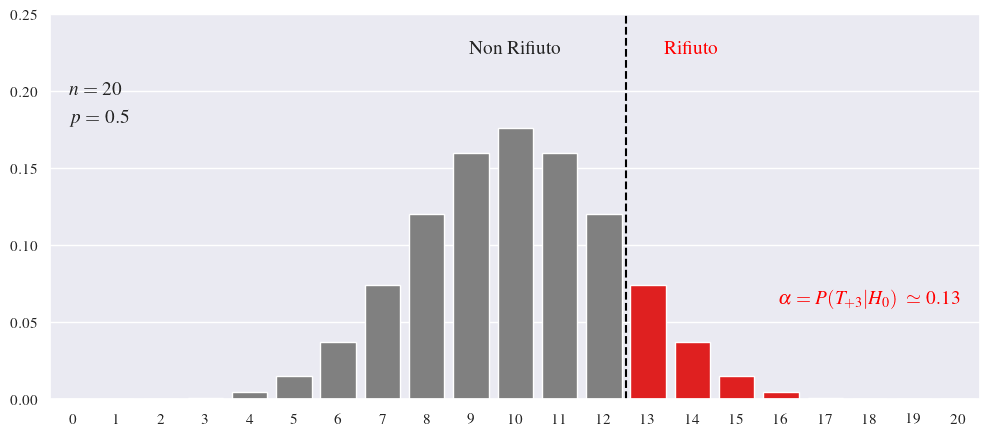

In [3]:
n=20; k=13; p=0.5
y, palette, q = f(n=n, k=k, p=p,  tail='upper', error='I')
ylim(0, 0.25)

barplot(x=y.index, y=y, palette=palette)
savefig('B-test_01.pdf',bbox_inches='tight')

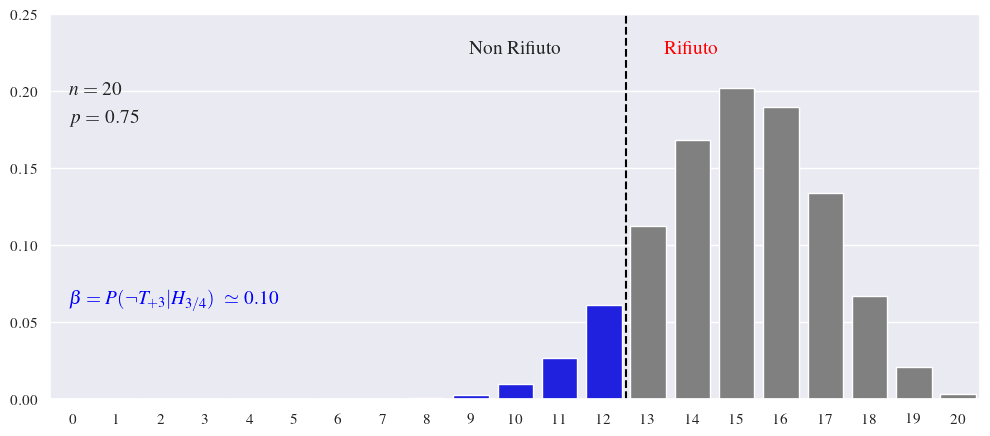

In [4]:
n=20; k=13; p=0.75
y, palette, q = f(n=n, k=k, p=p,  tail='upper', error='II')   
ylim( 0, 0.25 )

barplot(x=y.index, y=y, palette=palette)
savefig('B-test_02.pdf',bbox_inches='tight')

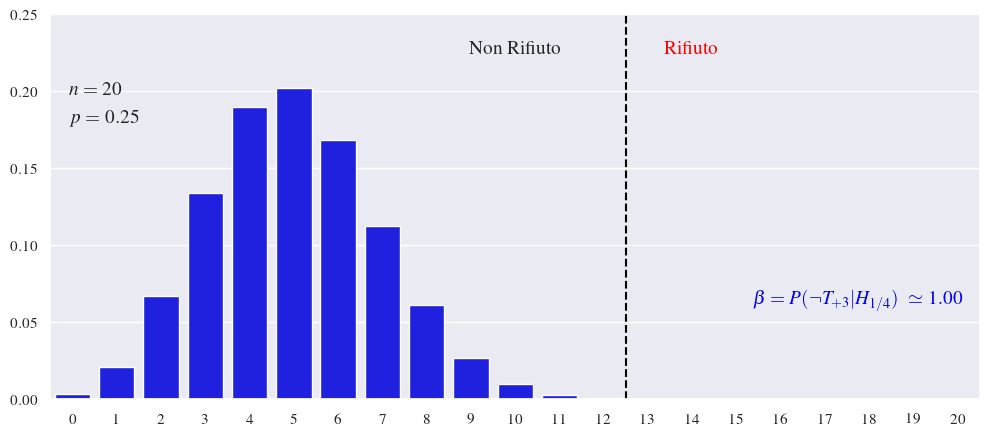

In [5]:
n=20; k=13; p=0.25
y, palette, q = f(n=n, k=k, p=p,  tail='upper', error='II')  
ylim( 0, 0.25 )  

barplot(x=y.index, y=y, palette=palette)
savefig('B-test_03.pdf',bbox_inches='tight')

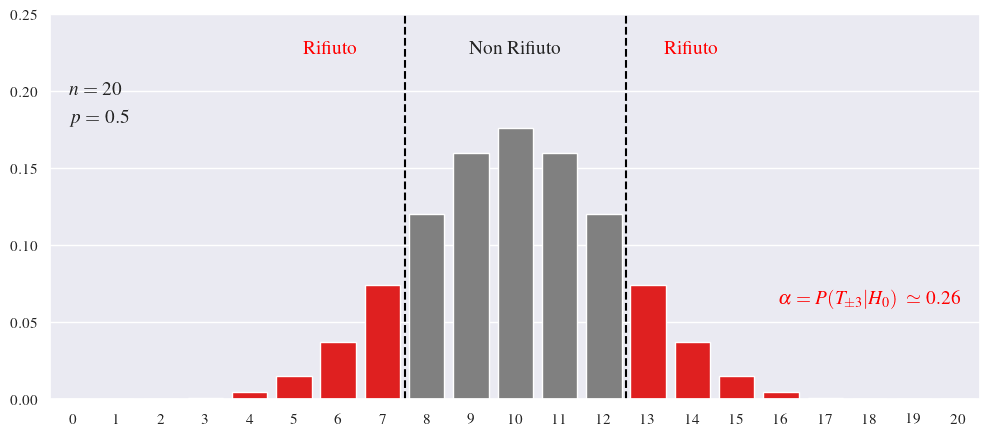

In [6]:
n=20; k=13; p=0.5
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='I')   
ylim(0, 0.25)

barplot(x=y.index, y=y, palette=palette)
savefig('B-test_04.pdf',bbox_inches='tight')

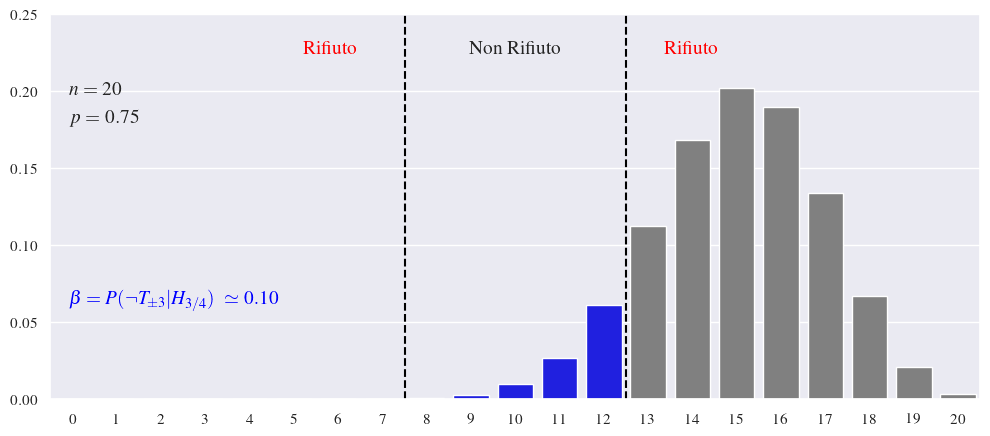

In [7]:
n=20; k=13; p=0.75
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')   
ylim(0, 0.25)

barplot(x=y.index, y=y, palette=palette)
savefig('B-test_05.pdf',bbox_inches='tight')

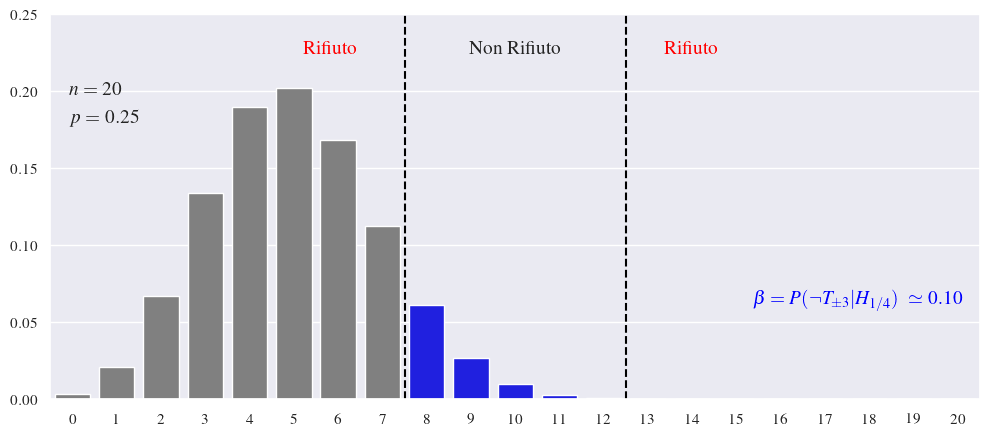

In [8]:
n=20; k=13; p=0.25
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')   
ylim(0, 0.25)

barplot(x=y.index, y=y, palette=palette)
savefig('B-test_06.pdf',bbox_inches='tight')

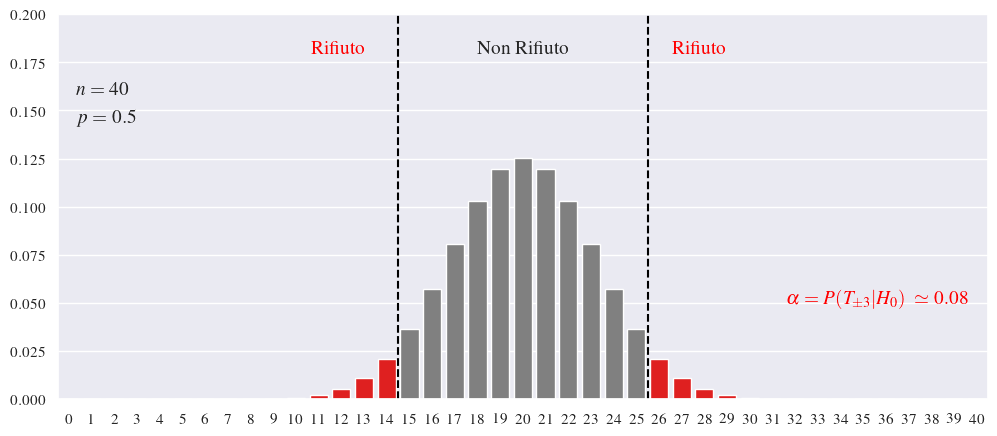

In [9]:
n=40; k=26; p=0.5
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='I')  
ylim(0, 0.20)

barplot(x=y.index, y=y, palette=palette)
savefig( 'B-test_07.pdf', bbox_inches='tight' )

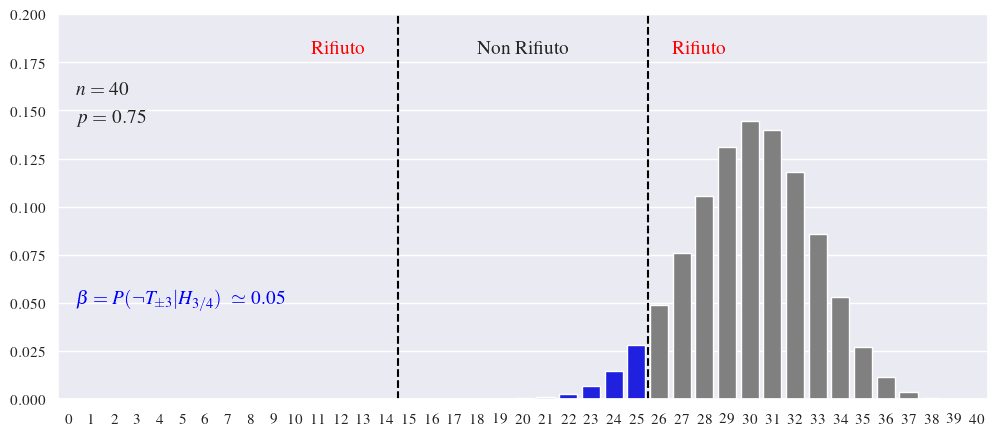

In [10]:
n=40; k=26; p=0.75
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')  
ylim(0, 0.20)

barplot(x=y.index, y=y, palette=palette)
savefig( 'B-test_08.pdf', bbox_inches='tight' )

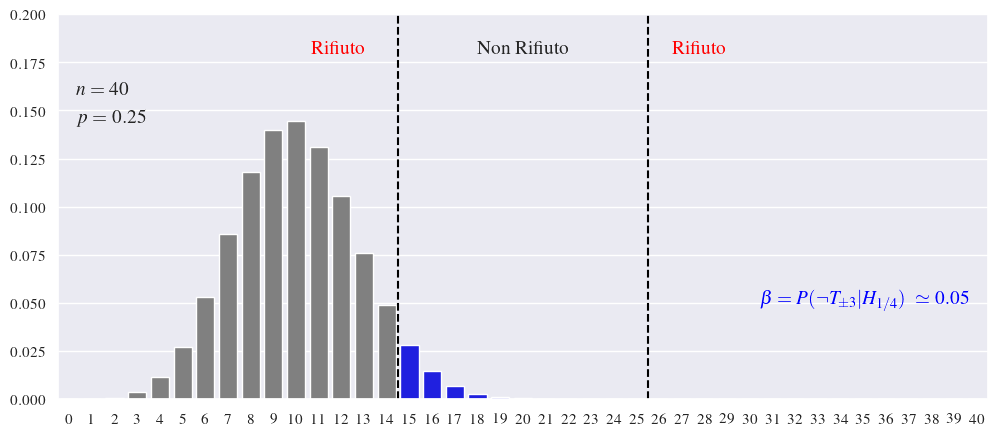

In [11]:
n=40; k=26; p=0.25
y, palette, q = f(n=n, k=k, p=p,  tail='two', error='II')
ylim(0, 0.20)

barplot(x=y.index, y=y, palette=palette)
savefig( 'B-test_09.pdf', bbox_inches='tight' )